## Assignment 1: Shengdi Lin

## 3 Practical Applications of Object Tracking/Detection
Before we start training the neural network for object tracking/detection, it is important to review a few applications of this technology in real life:
1. Facial Recognition: as noted in the lecture, this application can be utilized for securing login credentials. One example is the iPhone's facial recognition. However, this use can be extended beyond merely unlocking our devices. It can also be used for scanning multiple faces for video surveillance. Casinos and retail chains have started incorporating this technology to identify when suspicious people enter their premises. By applying facial recognition to a real time video feed, one can identify individuals from cameras. This, of course, poses valid questions on when it acceptable to utilize such technology to keep the privacy of the public safe as well. 
2. Autonomous Vehicles: Automakers similar to Tesla use object detection when given real time feeds for their cars to understand what objects may be in their path. By classifying such objects, the self-driving model has more inputs to help its decision making. 
3. Image Search: Objects in images can now be identified and labels can be created that allows users to utilize search functions in image libraries to look up generic terms. E.g., using an iPhone, one could look up "flower" and object detection can be utilized when doing these searches to find such images; or the label could have been created at the time of the photo, in which case object detection is still utilized to provide a label to be stored along with the image.

## Preprocess the Data
Now that we have defined a number of real life use cases, we'll start training an object detection model, specifically for face detection. First, we have to process the image and ensure that the RGB scheme matches what we expect to see and do any necessary adjustments. We also have to resize the image to normalize it for standardization if we wanted to use additional images.

Object Type of the image loaded by OpenCV:  <class 'numpy.ndarray'>
Shape of the img1 array (500, 700, 3)


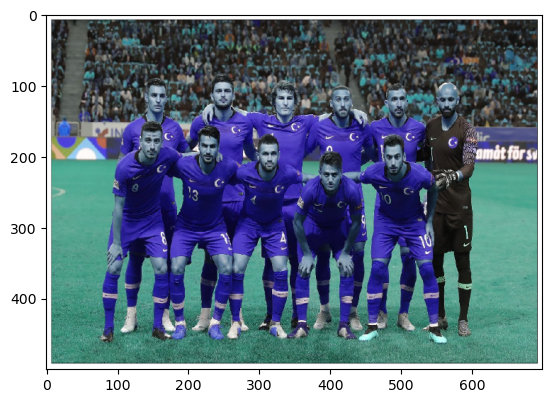

In [2]:
#Import in the necessary libraries
import matplotlib.pyplot as plt
import cv2
import warnings
warnings.filterwarnings('ignore')

# Read in the given image
img1 = cv2.imread('sportsteam.png')

# Resize the image
img1 = cv2.resize(img1, (700, 500))

# Ensure that it is imported as a numpy array
print('Object Type of the image loaded by OpenCV: ', type(img1))
print('Shape of the img1 array', img1.shape)

# Print the image for viewing before color preprocessing
plt.imshow(img1)

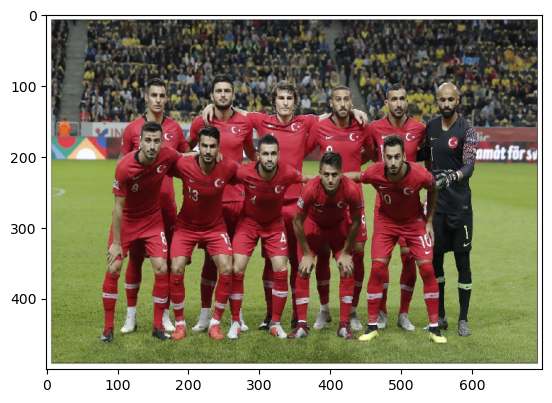

In [3]:
# Adjust the image coloring and show the adjusted image
img1_rgb = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
plt.imshow(img1_rgb)

To continue with the preprocessing, we will change the photo to a grayscale image and blur the image so elements that are focused in the image will be more standardized with other elements of the image. This morphs the image into a format that the haar cascade frontal face classifier we will utilize later will "recognize" better due to it following the guidelines of the images that the classifier was trained on. 

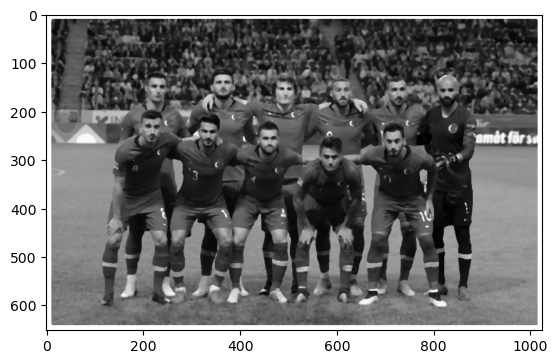

In [4]:
# first, change to grayscale
img1_gray = cv2.imread('sportsteam.png', cv2.IMREAD_GRAYSCALE)
# second, blur the image using MedianBlur
img1_gray_blur = cv2.medianBlur(img1_gray, 5)
plt.imshow(img1_gray_blur, cmap="gray")

## Utilize Haar Frontal Face Classifier on our Image

The next step is to load in the haar cascade frontal face classifier embedded within the cv2 library and read in our test image. 

In [5]:
# Load built-in frontal face cascade classifier
face_classifier = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

# Load in the test image and convert it to gray
img = cv2.imread('sportsteam.png')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
print(gray.shape)

(652, 1025)


As we can tell from above, our "gray" object now holds our test image properly formatted as a 2D numpy array. It has 652 pixels of height and 1025 pixels of width. Each entry in the 2D array contains a number between 0 to 255 to indicate the level of gray that certain pixel has. Now that we have the data in a manageable format, we need to apply the classifier to it and print the number of faces it detects. 

In [6]:
faces = face_classifier.detectMultiScale(gray, 1.05, 3)
print("Number of faces detected: ", len(faces))

# When no faces detected, face_classifier returns an empty tuple
if len(faces) == 0:
    print("No Faces Found")

# plot the rectangle for each face: x is the x coordinate, y is the y coordinate
# w is the width of the rectangle, and h is the height of the rectangle
for (x,y,w,h) in faces:
    cv2.rectangle(img,(x,y),(x+w,y+h),(127,0,255),2)
    cv2.imshow('Faces',img)
    cv2.waitKey(0)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = img[y:y+h, x:x+w]
    
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

#reload our image for future runs
img = cv2.imread('sportsteam.png')
cv2.destroyAllWindows()

Number of faces detected:  17


As we can see when running this code, we ran the detectMultiScale method with parameters: imageScale = 1.05 and minNeighbors = 3. imageScale essentially changes the size of the face if detected in the image if present; by rescaling the input image, it allows the algorithm to map the faces in the input image to the images it was trained on, raising its accuracy. If this number is high, say 4, it skips multiple levels of image "zooms", increasing speed with less calculations but also potentially decreasing accuracy as faces of a certain size may no longer be detected by an algorithm that runs a smaller imageScale. minNeighbors directly correlates to the quality of the face, the "sureness" of the algorithm. When set too low, the algorithm may detect faces that are not actually there. Increasing this number raises the amount of conditions the "face" that the classifier is considering has to fulfill to be returned as a face. So by increasing this number, you add more "sureness" to the algorithm for it to return that it is a face. 


In the case of this run, we can see from the pop out window that the classifier sees 17 faces when we can see there are actually 11. However, we see that every face is classified as a face. So, we need to trim the faces that are classified as such but actually aren't there. We can leave the imageScale parameter alone and increase the minNeighbors parameter. Let's run the same image again with parameters imageScale = 1.05 and minNeighbors = 12.

In [7]:
faces = face_classifier.detectMultiScale(gray, 1.05, 12)
print("Number of faces detected: ", len(faces))

# When no faces detected, face_classifier returns an empty tuple
if len(faces) == 0:
    print("No Faces Found")
    
for (x,y,w,h) in faces:
    cv2.rectangle(img,(x,y),(x+w,y+h),(127,0,255),2)
    cv2.imshow('Faces',img)
    cv2.waitKey(0)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = img[y:y+h, x:x+w]
    
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
    
cv2.destroyAllWindows()

Number of faces detected:  11


## Final Thoughts and Tests
So, from the new pop out window, we can see that all 11 faces are correctly identified. We can deduce that the haar frontal face cascade classifier is an appropriate classifier for our test image. By tuning the parameters, we were able to correctly classify each face in the photo; this is after we processed our image and imported in the appropriate libraries to run this face detection algorithm. To finish the assignment, let us run the algorithm on two other test images.

In [8]:
img = cv2.imread('img2.png')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

faces = face_classifier.detectMultiScale(gray, 1.05, 4)
print("Number of faces detected: ", len(faces))

# When no faces detected, face_classifier returns an empty tuple
if len(faces) == 0:
    print("No Faces Found")

# plot the rectangle for each face: x is the x coordinate, y is the y coordinate
# w is the width of the rectangle, and h is the height of the rectangle
for (x,y,w,h) in faces:
    cv2.rectangle(img,(x,y),(x+w,y+h),(127,0,255),2)
    cv2.imshow('Faces',img)
    cv2.waitKey(0)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = img[y:y+h, x:x+w]
    
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cv2.destroyAllWindows()

Number of faces detected:  3


As we can see from this second test image, our classifier does not do so well. it does not recognize faces at an angle or covered with other apendages, such as hands. Faces with certain tilts, such as lookind donward and away from the camera, also seem to give it trouble. Increasing minNeighbors and decreasing imageScale started added faces that weren't actually there and was not helpful in identifying the other real faces. This makes sense, since the training data did not include only faces at other angles or were otherwise blocked, only images that had faces with a full frontal view with the camera. 

In [9]:
img = cv2.imread('img3.png')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

faces = face_classifier.detectMultiScale(gray, 1.05, 12)
print("Number of faces detected: ", len(faces))

# When no faces detected, face_classifier returns an empty tuple
if len(faces) == 0:
    print("No Faces Found")

# plot the rectangle for each face: x is the x coordinate, y is the y coordinate
# w is the width of the rectangle, and h is the height of the rectangle
for (x,y,w,h) in faces:
    cv2.rectangle(img,(x,y),(x+w,y+h),(127,0,255),2)
    cv2.imshow('Faces',img)
    cv2.waitKey(0)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = img[y:y+h, x:x+w]
    
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cv2.destroyAllWindows()

Number of faces detected:  2


A similar error occurs with this image. Once again, the faces are not head on, but the classifier is able to discern two faces. However, the middle basketball player is not identified even tweaking the parameters a handful of times. It seems that the background against his head seems to be dark, and given the skin tone, the classifier might not be able to interpret differences in the grayscale correctly to label it as a face. To be fair, the face is also at an angle. The haar cascade frontal face classifier evidently has incredible applications but can fall short when the images it is given have faces that are at angles, obscured, or have other impediments/uncommon points that are different from the data it was trained on. 